##  Over and Downregulation

In [1]:
# in this part we want to detect reactions that could be over or down regulated in order to increase the production of our objective resveratrol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cameo.strain_design.deterministic import DifferentialFVA

In [2]:
# Verify working directory and change it if needed
import os
os.getcwd()
os.chdir("C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/") #change accordingly

In [3]:
# Read the heterologous model
model = read_sbml_model("data/models/yeast_resv.xml")

#### Flux Scanning based on Enforced Objective Flux

In [4]:
# Apply the Flux Scanning based on Enforced Objective Flux from the cameo package
fseof = FSEOF(model)

In [5]:
# Define the final reaction for trans-resveratrol reaction as objective
## the result shows that the amount of reaction rate of the reaction VVVST1 has increased by fold 10
result = fseof.run(target=model.reactions.VVVST1)
result.data_frame

,1,2,3,4,5,6,7,8,9,10
2DDA7Ptm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278
ACALDtm,-0.843190,-0.694621,-0.579200,-0.365771,-0.027022,-0.070125,-0.056405,-0.042685,-0.028965,-0.015245
ACCOAC,0.424195,0.733910,1.043587,1.353126,1.661693,1.968925,2.275470,2.582016,2.888561,3.195107
AGPRim,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611
ACGKm,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611
...,...,...,...,...,...,...,...,...,...,...
UGLT,-0.446925,-0.411087,-0.375085,-0.338499,-0.297816,-0.251504,-0.202297,-0.153090,-0.103882,-0.054675
PYRDC,15.967043,15.988731,16.011570,16.027983,15.718955,15.498931,15.373364,15.228450,15.080402,14.932355
HA-TAL,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714
AT-4CL1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714


In [6]:
# describing the increase or decrease in fold -- target molecule has increased by 10
df=result.data_frame
df['change']=df[10]/df[1]
df

,1,2,3,4,5,6,7,8,9,10,change
2DDA7Ptm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278,0.075221
ACALDtm,-0.843190,-0.694621,-0.579200,-0.365771,-0.027022,-0.070125,-0.056405,-0.042685,-0.028965,-0.015245,0.018080
ACCOAC,0.424195,0.733910,1.043587,1.353126,1.661693,1.968925,2.275470,2.582016,2.888561,3.195107,7.532166
AGPRim,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611,0.247718
ACGKm,0.042835,0.039400,0.035949,0.032443,0.028544,0.048810,0.039260,0.029710,0.020161,0.010611,0.247718
...,...,...,...,...,...,...,...,...,...,...,...
UGLT,-0.446925,-0.411087,-0.375085,-0.338499,-0.297816,-0.251504,-0.202297,-0.153090,-0.103882,-0.054675,0.122336
PYRDC,15.967043,15.988731,16.011570,16.027983,15.718955,15.498931,15.373364,15.228450,15.080402,14.932355,0.935199
HA-TAL,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,10.000038
AT-4CL1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,10.000038


In [19]:
sort=df.sort_values(by=['change'], ascending=False)
sort['change'].replace({0: np.nan, -np.inf: np.nan, np.inf: np.nan}, inplace=True)
# target molecule
sort=sort.dropna()
sort

,1,2,3,4,5,6,7,8,9,10,change
CYSTS,0.001759,0.001618,0.001476,0.001332,0.001172,0.004388,0.122319,0.236379,0.349813,0.463247,263.358158
HA-TAL,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,10.000038
AT-4CL1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,10.000038
VVVST1,0.106071,0.212143,0.318214,0.424286,0.530357,0.636428,0.742500,0.848571,0.954643,1.060714,10.000000
HSK,0.100623,0.092554,0.084448,0.086731,0.077226,0.241426,0.431768,0.614371,0.795721,0.977071,9.710215
...,...,...,...,...,...,...,...,...,...,...,...
DDPAm,0.176521,0.152992,0.139594,0.120201,0.101581,0.061080,0.049129,0.037179,0.025229,0.013278,0.075221
CITtbm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278,0.075221
E4Ptm,0.176521,0.152992,0.139594,0.120201,0.101581,0.061080,0.049129,0.037179,0.025229,0.013278,0.075221
2DDA7Ptm,-0.176521,-0.152992,-0.139594,-0.120201,-0.101581,-0.061080,-0.049129,-0.037179,-0.025229,-0.013278,0.075221


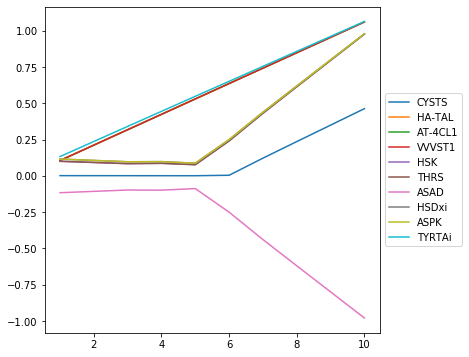

In [20]:
# Overexpression of these reactions and more lead to 10-fold increase of resveratrol
sort.drop(['change'], axis=1, inplace=True)
sort.head(10).T.plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
reaction=sort.head(10).index.values.tolist()
for rx in reaction:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction)

CYSTS    Cystathionine beta synthase    hcys__L_c + ser__L_c --> cyst__L_c + h2o_c
HA-TAL        tyr__L_c --> coumarate4 + nh4_c
AT-4CL1        atp_c + coa_c + coumarate4 --> amp_c + e4_coumaroyl_coa + ppi_c
VVVST1        e4_coumaroyl_coa + 3.0 h_c + 3.0 malcoa_c --> 4.0 co2_c + 4.0 coa_c + trans_resv
HSK    Homoserine kinase    atp_c + hom__L_c --> adp_c + h_c + phom_c
THRS    Threonine synthase    h2o_c + phom_c --> pi_c + thr__L_c
ASAD    Aspartate-semialdehyde dehydrogenase    aspsa_c + nadp_c + pi_c <-- 4pasp_c + h_c + nadph_c
HSDxi    Homoserine dehydrogenase  NADH   irreversible    aspsa_c + h_c + nadh_c --> hom__L_c + nad_c
ASPK    Aspartate kinase    asp__L_c + atp_c --> 4pasp_c + adp_c
TYRTAi    Tyrosine transaminase  irreversible    34hpp_c + glu__L_c --> akg_c + tyr__L_c


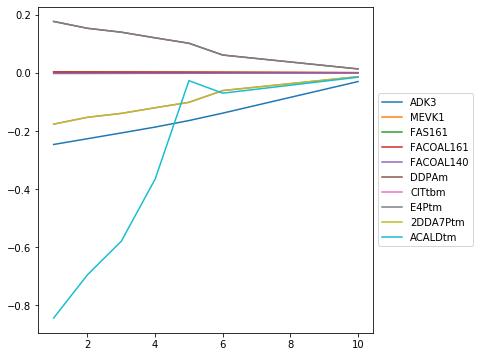

In [26]:
# Down regulation of these reactions and more lead to 10-fold increase of resveratrol
sort.tail(10).T.plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
reaction=sort.tail(10).index.values.tolist()
for rx in reaction:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction)

ADK3    Adentylate kinase (GTP)    amp_c + gtp_c <=> adp_c + gdp_c
MEVK1    Mevalonate kinase  atp     atp_c + mev__R_c --> 5pmev_c + adp_c + h_c
FAS161    Fatty acid synthase  n C161     4.0 h_c + malcoa_c + 3.0 nadph_c + o2_c + ttdca_c --> co2_c + coa_c + 3.0 h2o_c + hdcea_c + 3.0 nadp_c
FACOAL161    Fatty acid  CoA ligase  hexadecenoate     atp_c + coa_c + hdcea_c <=> amp_c + hdcoa_c + ppi_c
FACOAL140    Fatty acid  CoA ligase  tetradecanoate     atp_c + coa_c + ttdca_c <=> amp_c + ppi_c + tdcoa_c
DDPAm    2 deoxy D arabino heptulosonate 7 phosphate synthetase  mitochondrial    e4p_m + h2o_m + pep_m --> 2dda7p_m + pi_m
CITtbm    Citrate transport  mitochondrial    cit_c + pep_m <=> cit_m + pep_c
E4Ptm    D erythrose 4 phosphate mtiochondrial transport via diffusion    e4p_c <=> e4p_m
2DDA7Ptm    2 Dehydro 3 deoxy D arabino heptonate7 phohsphate mitochondrial transport via diffusion    2dda7p_c <=> 2dda7p_m
ACALDtm    Acetaldehyde mitochondrial diffusion    acald_m <=> acald_c


In [22]:
# Save reaction rates as json file
sort[10].to_json('C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/data/fseof_reactions.json')

#### Differential Flux Variability Analysis

In [63]:
# Set the original model as reference to be compared with a set of models where n-reaction bounds are varied
reference_model = model.copy()
biomass_rxn = reference_model.reactions.BIOMASS_SC5_notrace
target = reference_model.metabolites.trans_resv

In [64]:
diff_fva = DifferentialFVA(design_space_model=model,
                           reference_model=reference_model,
                           objective=target,
                           variables=[biomass_rxn],
                           normalize_ranges_by=biomass_rxn,
                           points=10)

In [65]:
result = diff_fva.run(surface_only=True)
result

,lower_bound,upper_bound,gaps,normalized_gaps,biomass,production,KO,flux_reversal,suddenly_essential,free_flux,reaction,excluded
reaction,,,,,,,,,,,,
PGL,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,PGL,False
GND,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,GND,False
G6PDH2r,0.000000,0.000000,-0.801635,-2.784754,0.12794,0.716157,True,False,False,False,G6PDH2r,False
PDHm,0.209950,0.209950,-0.498439,-0.819831,0.12794,0.716157,False,False,False,False,PDHm,False
CSm,0.130346,0.130346,-0.398933,-0.819831,0.12794,0.716157,False,False,False,False,CSm,False
...,...,...,...,...,...,...,...,...,...,...,...,...
PYK,16.792033,16.792033,-0.929957,69.685565,0.12794,0.716157,False,False,False,False,PYK,False
GAPD,18.291976,18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,GAPD,False
PGK,-18.291976,-18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,PGK,False


In [ ]:
# Visualize the reaction rate changes in escher map
result.display_on_map(5, map_name="iMM904.Central carbon metabolism")